

---


# Data Exploratory, LSMA
First assignment

*Author : ERGUN Emrullah*



---



In this notebook, our goal is to obtain conclusions or have interesting observations from the spotify dataset. The data set contains characteristics used to characterize music.

I will try :
1. Explore the data
2. Clean up the data
3. Visualize the data
4. Extrapolate style groups for each of the musics.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
sns.set_context("talk")

[Spotify Tracklist APY](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) 


---


Features of Audio objets




---



```
>danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	Float
```



```
>danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.	Float
```

```
>duration_ms
The duration of the track in milliseconds.	Integer
```
```
>energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.	Float
```
```
>id
The Spotify ID for the track.	String
```
```
>instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.	Float
```
```
>key
The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.	Integer
```
```
>liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.	Float
```
```
>loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.	Float
```

```
>mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.	Integer
```

```
>speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.	Float
```
```
>tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.	Float
```
```
>time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).	Integer
```
```
>track_href
A link to the Web API endpoint providing full details of the track.	String
```
```
>type
The object type: “audio_features”	String
```
```
>uri
The Spotify URI for the track.	String
```
```
>valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).	Float
```


In [ ]:
# Modify with your own path in google drive

local_spotify_music_track_csv ='/content/gdrive/My Drive/UPM_ALUMNOS_2021/LSMA/P1_Exploratory_Data_Analysis/Spotify_Features.csv'
import pandas as pd

Spotify_music_track = df = pd.read_csv(local_spotify_music_track_csv, thousands  = ',')

df_summary = Spotify_music_track.describe()
df_summary

,speechiness,key,time_signature,liveness,loudness,duration_ms,danceability,duration,valence,acousticness,volume_number,energy,tempo,instrumentalness,mode,number
count,1197.000000,1197.000000,1196.000000,1197.000000,1197.000000,1197.000000,1197.000000,1229.000000,1197.000000,1197.000000,1229.000000,1197.000000,1197.000000,1197.000000,1197.000000,1229.000000
mean,0.087622,5.218881,3.987458,0.188720,-5.432014,230726.954887,0.640473,221.580960,0.567306,0.123621,31.661513,0.735389,121.229165,0.009155,0.632414,10.596420
std,0.081704,3.619283,0.180218,0.146907,1.871101,36951.681542,0.134858,27.120722,0.218734,0.177363,17.605133,0.153227,27.614290,0.063456,0.482349,5.849902
min,0.023300,0.000000,3.000000,0.021000,-14.001000,102857.000000,0.209000,125.000000,0.059400,0.000009,1.000000,0.132000,51.316000,0.000000,0.000000,1.000000
25%,0.036700,2.000000,4.000000,0.088900,-6.362000,206413.000000,0.553000,203.000000,0.396000,0.009820,16.000000,0.638000,99.898000,0.000000,0.000000,6.000000
50%,0.051900,5.000000,4.000000,0.131000,-5.162000,226739.000000,0.646000,221.000000,0.579000,0.049900,32.000000,0.754000,120.034000,0.000000,1.000000,11.000000
75%,0.099800,8.000000,4.000000,0.251000,-4.150000,247680.000000,0.731000,237.000000,0.738000,0.166000,47.000000,0.860000,136.960000,0.000017,1.000000,16.000000
max,0.517000,11.000000,5.000000,0.904000,-1.600000,484147.000000,0.967000,353.000000,0.968000,0.966000,61.000000,0.991000,210.877000,0.885000,1.000000,22.000000


Firstly we make sure that all features has a normal range ( noted on the informations above ) 

Everythings looks alright, there is no outliers to work on.

In [ ]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')


Total Features:  3 categorical + 16 numerical = 19 features


In [ ]:
df.isna().sum()

speechiness         32
key                 32
time_signature      33
liveness            32
loudness            32
duration_ms         32
danceability        32
duration             0
valence             32
acousticness        32
spotify_id          32
volume_number        0
energy              32
tempo               32
instrumentalness    32
mode                32
number               0
artist               0
title                0
dtype: int64

Here we show the number on NaN values for every columns. 
It is very important as the majority of Machine Learning algorithm can't do any computation with NaN values


In [ ]:
df_number = df.select_dtypes(include=['int64','float64'])

Now we will look more in depth of our NaN values to make a decision about them

In [ ]:
df[df.isna().any(axis=1)]

,speechiness,key,time_signature,liveness,loudness,duration_ms,danceability,duration,valence,acousticness,spotify_id,volume_number,energy,tempo,instrumentalness,mode,number,artist,title
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,16,Taylor Swift,Fearless
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,19,Jaicko,Fast Forward
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,6,Christina Milian,AM to PM
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,14,JIVEjones,"Me, Myself & I"
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,11,JoJo,Baby It's You
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,20,Taylor Swift,Our Song
226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,6,Taylor Swift,I Knew You Were Trouble
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227,NaN,NaN,NaN,47,NaN,NaN,NaN,NaN,15,Taylor Swift,22
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,12,Aaliyah,I Care 4 U
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,1,Taylor Swift,Blank Space


We can see that songs that contain NaN are globally useless because they don't contain a lot of information. But there is a line that contains data, so we will try to see if we can reconstruct it. But in fact, it's only a line on ~1300, so we're going to think about whether we should drop it or take it.



In [ ]:
df[(df == 'The Black Eyed Peas').any(axis=1)].count()

speechiness         11
key                 11
time_signature      10
liveness            11
loudness            11
duration_ms         11
danceability        11
duration            11
valence             11
acousticness        11
spotify_id          11
volume_number       11
energy              11
tempo               11
instrumentalness    11
mode                11
number              11
artist              11
title               11
dtype: int64

Now we see that we already have a lot of song comming from The Black Eyed Peas so we choose to drop rows that are not complete. 

In contrary we dont have a lot of bad data coming from taylor swift.

In [ ]:
df[(df == 'Taylor Swift').any(axis=1)].count()

speechiness          0
key                  0
time_signature       0
liveness             0
loudness             0
duration_ms          0
danceability         0
duration            14
valence              0
acousticness         0
spotify_id           0
volume_number       14
energy               0
tempo                0
instrumentalness     0
mode                 0
number              14
artist              14
title               14
dtype: int64

All songs from Taylor Swift are inusable and its sad because we would like to have her to train our Model. 

We choose to not reconstruct anything as its very difficult and we dont have much time so we drop them in order to create the heat map and see if the PCA component analysis coulb be used to lower the number of features wa have.

Plus we will drop columns that we think are irrelevent in order to cluster the music based on their style.
1. Duration
2. Duration_ms
3. number




In [ ]:
df_number_cleaned1 = df_number.dropna()
df_number_cleaned = df_number_cleaned1.drop(["duration","duration_ms","number"],axis=1)
df_number_cleaned.isna().sum()

speechiness         0
key                 0
time_signature      0
liveness            0
loudness            0
danceability        0
valence             0
acousticness        0
volume_number       0
energy              0
tempo               0
instrumentalness    0
mode                0
dtype: int64

In [ ]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop(["duration","duration_ms","number"],axis=1)
#df_cleaned= df_cleaned.set_index('artist')
df_cleaned = df_cleaned.drop(["spotify_id"], axis=1)

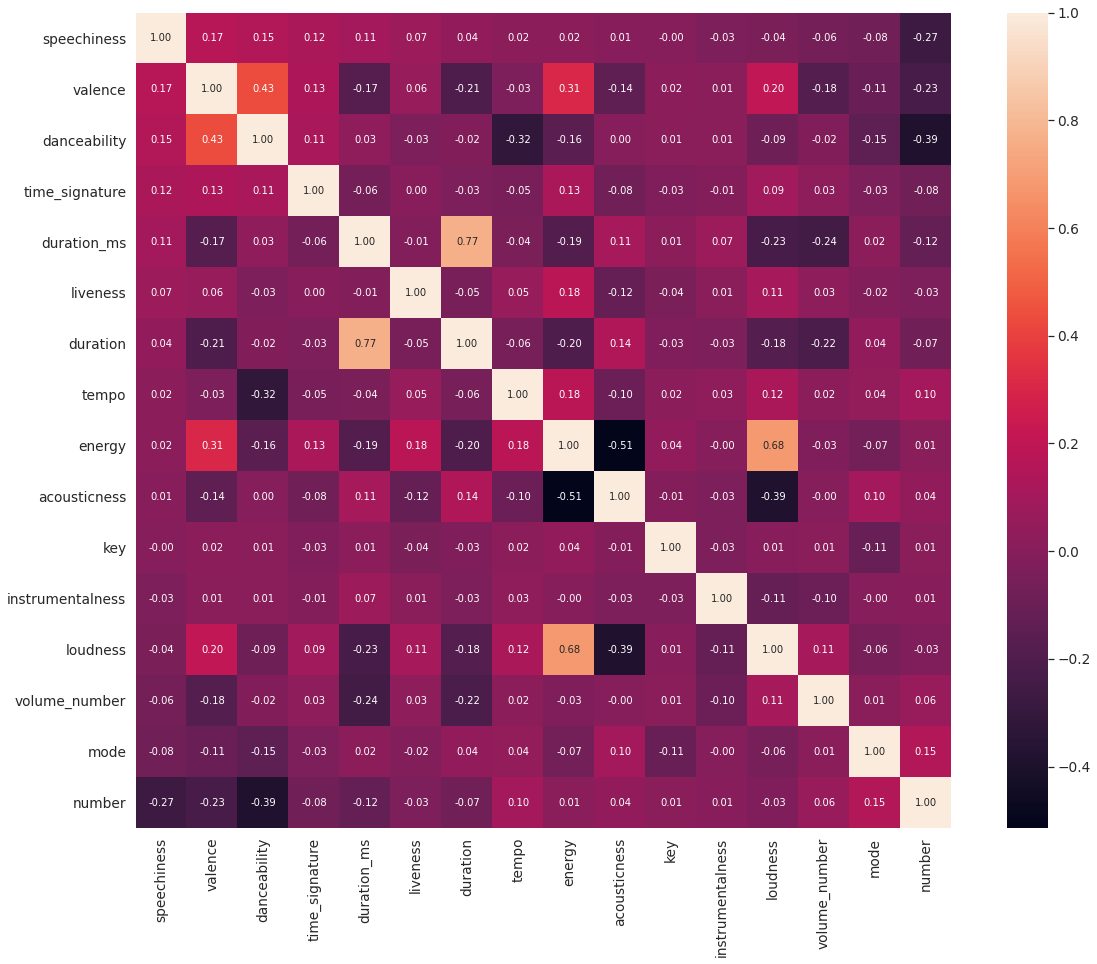

In [ ]:
#Heatmap

corrmat = df_number_cleaned1.corr()
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'speechiness')['speechiness'].index
cm = np.corrcoef(df_number_cleaned1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We learn that :


1.   energy/loudness strongly correlated
2.   duration/duration_ms (quite predictable)
3.   danceability/valence
4.   valence/energy

Indeed Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric). So we can think that valence use the danceability to be estimated like there is a strong relationship beetween these two.



Lets normalize the data in order to boxplot them and to see if there is aberations

In [ ]:
normalized_df=(df_number_cleaned-df_number_cleaned.mean())/df_number_cleaned.std()
normalized_df

,speechiness,key,time_signature,liveness,loudness,danceability,valence,acousticness,volume_number,energy,tempo,instrumentalness,mode
0,0.647507,-0.338133,0.069592,-0.929200,-0.333554,1.856824,1.154419,0.442032,-1.051380,-0.140702,-0.732770,-0.140648,-1.310246
1,-0.392136,1.320405,0.069592,-0.703258,0.007901,0.744994,-0.939119,-0.472137,-1.051380,-1.048095,-0.985514,1.856220,-1.310246
2,1.582569,-0.614556,0.069592,-0.940769,-0.604474,0.263201,-0.157471,-0.560623,-1.051380,-1.139487,-1.131983,-0.144334,-1.310246
3,2.628363,-1.167401,0.069592,-0.931242,0.306608,0.374384,1.414968,-0.591621,-1.051380,0.799332,-1.029654,-0.144334,0.762577
4,1.927066,-0.061710,0.069592,-0.665828,-0.899440,-0.500255,0.048226,-0.694817,-1.051380,-0.845727,2.000238,-0.144334,-1.310246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,-0.357686,-0.338133,0.069592,2.234665,-1.263338,0.796880,1.538386,1.129631,-0.541465,0.375011,-0.592783,-0.144334,-1.310246
1224,-0.563154,-0.890978,0.069592,-0.628398,-0.065306,-0.040699,-0.422591,-0.618674,-0.541465,0.518627,0.032163,-0.144334,0.762577
1226,-0.510249,-0.614556,0.069592,0.485658,0.850051,-0.826392,0.299633,-0.695336,-0.541465,1.217124,-0.411408,-0.144334,0.762577
1227,-0.735402,-0.614556,0.069592,1.533701,0.717530,-1.478666,-0.111760,-0.692332,-0.541465,0.518627,1.550223,-0.144334,0.762577


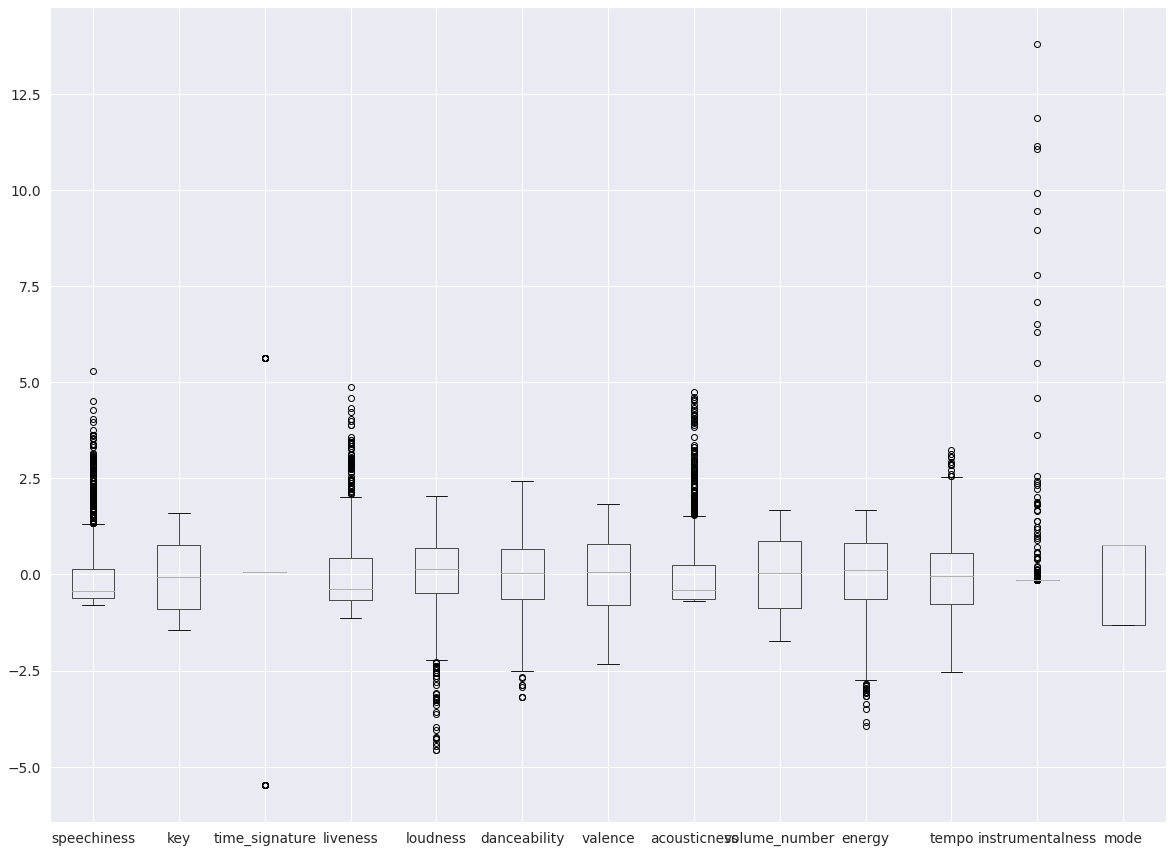

In [ ]:
normalized_df.boxplot()

So what we learn on this graphic and what will our next move :

1.  We need to investigate on instrumentalness 
2.  We need to check whats is time_signature 

And everythings looks quite normal as our goals for the EDA is to cluster song based on theirs feature and trying to acheive a relevant clustering based on our knowledges of songs style.





Lets do a PCA component in order to look if there is any possible clustering application on all these data.


# PCA Transformation

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_number_cleaned)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
existing_2d = pca.transform(df_number_cleaned)

In [ ]:
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = df_cleaned.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d['artist'] = df_cleaned['artist']
existing_df_2d['title'] = df_cleaned['title']
existing_df_2d

,PC1,PC2,artist,title
0,-20.591097,18.179615,Justin Timberlake,Rock Your Body
1,-27.550532,18.024448,Jennifer Lopez,I'm Glad
2,-31.619854,17.978296,B2K,Girlfriend
3,-28.783296,18.017853,Jay-Z,Excuse Me Miss
4,54.863062,19.618788,Ginuwine featuring Baby,Hell Yeah
...,...,...,...,...
1223,-16.570982,9.275158,KT Tunstall,Black Horse and the Cherry Tree
1224,0.700240,9.580261,Saving Jane,Girl Next Door
1226,-11.529875,9.326429,The All-American Rejects,Move Along
1227,42.630220,10.355398,Nickelback,Savin' Me


In [ ]:
print(pca.explained_variance_ratio_) 


[0.6991366  0.28537546]


We see that the first PC already explains almost 70% of the variance, while the second one accounts for another 28% for a total of almost 98% between the two of them.

Now we are ready to plot the lower dimensionality version of our dataset. We just need to call plot on the data frame, by passing the kind of plot we want (see [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html) for more on plotting data frames) and what columns correspond to each axis. We also add colors on every music based on the artist who interpeted them

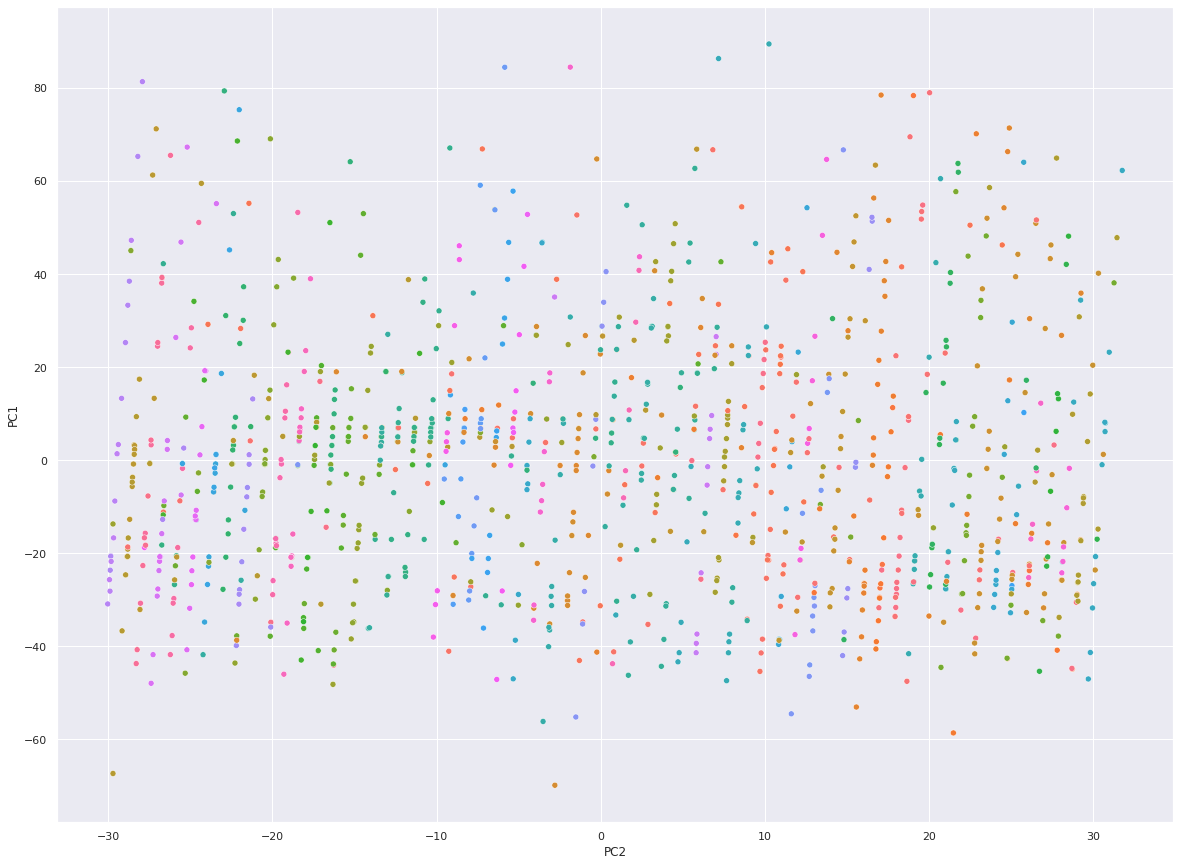

In [ ]:
#%matplotlib inline

#ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8), grid=True)

#for i, country in enumerate(df_cleaned.index):
#    ax.annotate(country, (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1))
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=existing_df_2d, x="PC2", y="PC1", hue="artist")
# remove legend from axis 'ax'
ax.legend_.remove()

plt.show()



Each colors represent one artist. On this chart we can clearly see that song of the same artists are placed on a line wich is a little oblique. Lets try to cluster our data in n cluster !

There is 742 artists in the dataset and we can imagine that they covers all music styles. So we look for a music genre categorisation to choose the number of cluster. 
According to wikipedia : 


> https://en.wikipedia.org/wiki/List_of_music_styles

So we take 15 for the number of cluster in our k_neighbourg parameter




In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15)

clusters = kmeans.fit(existing_df_2d[['PC1', 'PC2']])

In [ ]:
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)

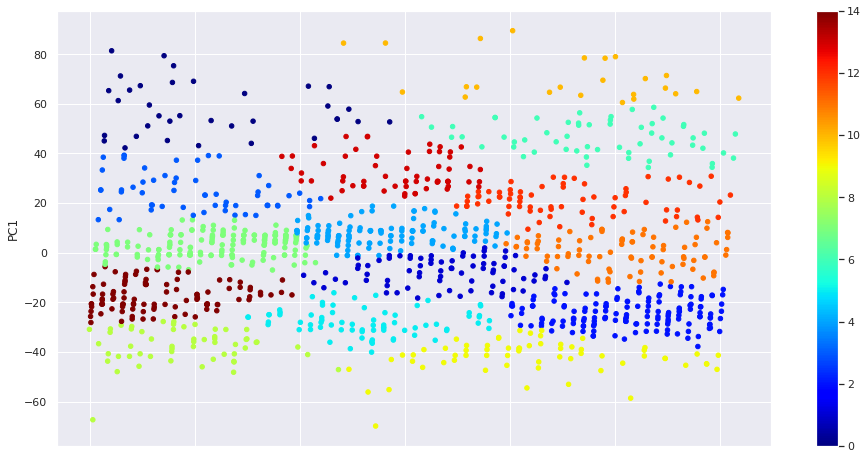

In [ ]:
import numpy as np

existing_df_2d.plot(
    kind='scatter',
    x='PC2',y='PC1',
    c=existing_df_2d.cluster.astype(np.float), 
    figsize=(16,8), grid=True,colormap = "jet")

Lets see if our classification is accurate 

Lets take a random cluster and analyse the artists that are related in.


In [ ]:
existing_df_2d[existing_df_2d["artist"]=='Jennifer Lopez']

,PC1,PC2,artist,title,cluster
1,-27.550532,18.024448,Jennifer Lopez,I'm Glad,2
103,-38.218748,22.847137,Jennifer Lopez,I'm Real,9
266,-32.184660,21.944993,Jennifer Lopez,Ain't It Funny,2
333,3.287970,27.619668,Jennifer Lopez,Waiting for Tonight,11
564,-21.569267,19.149514,Jennifer Lopez,Jenny from the Block,2
683,-16.948605,24.235585,Jennifer Lopez,Play,2
763,-24.108604,25.102395,Jennifer Lopez,Love Don't Cost a Thing,2


In [ ]:
existing_df_2d[existing_df_2d["cluster"]==5]


,PC1,PC2,artist,title,cluster
82,-30.145693,-2.026650,Rihanna featuring Jeezy,Hard,5
87,-30.143066,-2.014343,Iyaz,Replay,5
88,-31.188381,-2.014137,Owl City,Fireflies,5
89,-24.147525,-1.901514,Train,"Hey, Soul Sister",5
91,-29.149990,-2.016155,Kris Allen,Live Like We're Dying,5
...,...,...,...,...,...
1072,-31.777830,-4.071421,Jason Derulo,Ridin' Solo,5
1073,-31.099470,-4.062049,Shontelle,Impossible,5
1128,-33.244321,0.923963,Kanye West,Heartless,5
1133,-30.276635,0.974558,Pink,Sober,5


In [ ]:
existing_df_2d[existing_df_2d["cluster"]==8]

,PC1,PC2,artist,title,cluster
156,-36.657753,-29.155165,Lukas Graham,Mama Said,8
158,-67.308437,-29.708219,Stanaj,Ain't Love Strange,8
223,-38.391871,-15.197069,Ariana Grande featuring Mac Miller,The Way,8
236,-30.915312,-15.060244,One Direction,Kiss You,8
238,-34.716403,-15.040410,Kodaline,All I Want,8
240,-34.917383,-15.109989,Classified,That's What I Do,8
243,-29.838538,-21.036461,"Enrique Iglesias featuring Sean Paul, Descemer...",Bailando,8
283,-44.020839,-16.264193,Justin Timberlake,Mirrors,8
285,-40.751864,-16.236496,Selena Gomez,Come & Get It,8
287,-48.151935,-16.307531,Bruno Mars,When I Was Your Man,8


In [ ]:
existing_df_2d[existing_df_2d["cluster"]==10]

,PC1,PC2,artist,title,cluster
11,79.003102,20.038262,Stacie Orrico,Stuck,10
43,78.396226,19.052177,Lumidee,"Never Leave You (Uh Oooh, Uh Oooh)",10
57,69.528964,18.844017,The Ataris,The Boys of Summer,10
92,64.770790,-0.238411,Adam Lambert,Whataya Want from Me,10
107,66.348907,24.795832,Jessica Simpson,A Little Bit,10
117,71.422176,24.894017,Blink-182,The Rock Show,10
350,63.810307,21.767311,Vanessa Carlton,Ordinary Day,10
360,61.924121,21.785865,Bon Jovi,Everyday,10
466,62.740601,5.738810,Fergie,Clumsy,10
481,66.879357,5.850293,Keith Urban,Everybody,10


In [ ]:
existing_df_2d[existing_df_2d["cluster"]==6]

,PC1,PC2,artist,title,cluster
4,54.863062,19.618788,Ginuwine featuring Baby,Hell Yeah,6
14,53.471093,19.556745,The Ataris,In This Diary,6
15,51.849201,19.535267,Sum 41,The Hell Song,6
26,38.727641,11.282679,Bow Wow featuring J-Kwon and Jermaine Dupri,Fresh AZIMIZ,6
36,45.459952,11.402174,Relient K,Who I Am Hates Who I've Been,6
58,41.579988,18.335199,Nickelback,Someday,6
72,35.253118,17.317267,Norah Jones,Sunrise,6
74,38.590134,17.276877,Fefe Dobson,Everything,6
76,51.570154,17.544216,Blink-182,Feeling This,6
78,42.731326,17.370623,Fuel,Falls on Me,6


As a music consummer, I feel like the clustering achieve a likeable performance but I don't how to mesure it effectively, neither I am perplexe about the number of cluster I choose.

# Conclusion:
Our exploration leads us to a very interresting use of the dataset, we used our domain knowledge to make decisions as the outliers in this dataset for particulars features are not a problem as it represent the diversity of the music as long as they have their expected values.

We understood that music style are not very clearly categorizable but specific music can be categorized based on their features. So we can find an usercase on recommender system and. And we learned that PCA component allows us to visualize the data even if we got 10 + features.
